In [2]:
import matplotlib.pyplot as plt

import iris
import iris.plot as iplt
import iris.quickplot as qplt

# load some data from a file in our local repository

fn = "/project/champ/data/CMIP6/CMIP/MOHC/UKESM1-0-LL/historical/r10i1p1f2/Amon/tas/gn/v20191213/tas_Amon_UKESM1-0-LL_historical_r10i1p1f2_gn_185001-194912.nc"
cube = iris.load_cube(fn) # loads a single cube

# create a time mean, averaging over latitude and longitude
grid_areas = iris.analysis.cartography.area_weights(cube)
time_mean_cube = cube.collapsed(['longitude', 'latitude'], iris.analysis.MEAN, weights=grid_areas)


/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))
/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


In [3]:
# Now let's load a couple of files, concatenate, process an plot the output

# first, load as separate cubes

fn1 = "/project/champ/data/CMIP6/CMIP/MOHC/HadGEM3-GC31-LL/historical/r1i1p1f3/Amon/tas/gn/v20190624/tas_Amon_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_185001-194912.nc"
fn2 = "/project/champ/data/CMIP6/CMIP/MOHC/HadGEM3-GC31-LL/historical/r1i1p1f3/Amon/tas/gn/v20190624/tas_Amon_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_195001-201412.nc"

cube1 = iris.load_cube(fn1)
cube2 = iris.load_cube(fn2)

print(cube1)
print(cube2)


/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))
/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


air_temperature / (K)               (time: 1200; latitude: 144; longitude: 192)
     Dimension coordinates:
          time                           x               -               -
          latitude                       -               x               -
          longitude                      -               -               x
     Scalar coordinates:
          height: 1.5 m
     Attributes:
          Conventions: CF-1.7 CMIP-6.2
          activity_id: CMIP
          branch_method: standard
          branch_time_in_child: 0.0
          branch_time_in_parent: 0.0
          cmor_version: 3.4.0
          comment: near-surface (usually, 2 meter) air temperature
          creation_date: 2019-06-19T11:21:17Z
          cv_version: 6.2.20.1
          data_specs_version: 01.00.29
          experiment: all-forcing simulation of the recent past
          experiment_id: historical
          external_variables: areacella
          forcing_index: 3
          frequency: mon
          further_info

/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


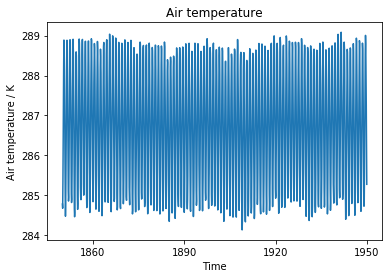

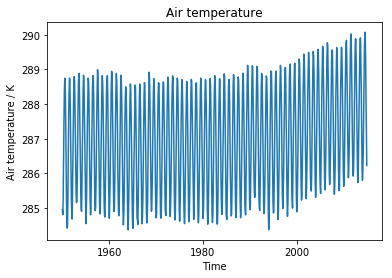

In [4]:
# These cubes can be summarised - area weighted in this case
grid_areas1 = iris.analysis.cartography.area_weights(cube1)
time_mean_1 = cube1.collapsed(['longitude', 'latitude'], iris.analysis.MEAN, weights=grid_areas1)

grid_areas2 = iris.analysis.cartography.area_weights(cube2)
time_mean_2 = cube2.collapsed(['longitude', 'latitude'], iris.analysis.MEAN, weights=grid_areas2)

qplt.plot(time_mean_1)
plt.show()

qplt.plot(time_mean_2)
plt.show()

/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))
/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))
/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


0: air_temperature / (K)               (time: 1200; latitude: 144; longitude: 192)
1: air_temperature / (K)               (time: 780; latitude: 144; longitude: 192)


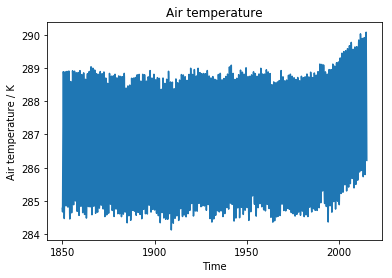

In [5]:
# Load a cubelist of two cubes, and concatenate the time (1850 - 2014)
fnlist = [fn1,fn2]
cubelist = iris.load(fnlist)

print(cubelist)

# Equalise the cube attributes to stop it throwing exceptions
from iris.experimental.equalise_cubes import equalise_attributes

equalise_attributes(cubelist)

cubelist_cat = cubelist.concatenate_cube()

grid_areas3 = iris.analysis.cartography.area_weights(cubelist_cat)
time_mean_3 = cubelist_cat.collapsed(['longitude', 'latitude'], iris.analysis.MEAN, weights=grid_areas3)

qplt.plot(time_mean_3)
plt.show()

air_temperature / (K)               (time: 165; latitude: 144; longitude: 192)
     Dimension coordinates:
          time                           x              -               -
          latitude                       -              x               -
          longitude                      -              -               x
     Auxiliary coordinates:
          year                           x              -               -
     Scalar coordinates:
          height: 1.5 m
     Attributes:
          Conventions: CF-1.7 CMIP-6.2
          activity_id: CMIP
          branch_method: standard
          branch_time_in_child: 0.0
          branch_time_in_parent: 0.0
          cmor_version: 3.4.0
          comment: near-surface (usually, 2 meter) air temperature
          cv_version: 6.2.20.1
          data_specs_version: 01.00.29
          experiment: all-forcing simulation of the recent past
          experiment_id: historical
          external_variables: areacella
          forcing_inde

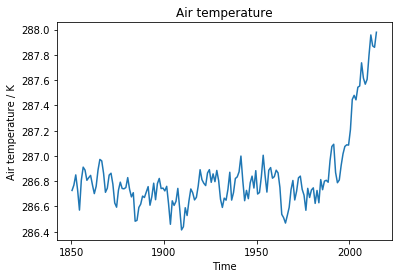

In [6]:
# Now aggregate to annual data

import iris.coord_categorisation

iris.coord_categorisation.add_year(cubelist_cat, 'time', name='year')

annual_mean = cubelist_cat.aggregated_by('year', iris.analysis.MEAN)
print(annual_mean)

grid_areas4 = iris.analysis.cartography.area_weights(annual_mean)
test = annual_mean.collapsed(['longitude', 'latitude'], iris.analysis.MEAN, weights=grid_areas4)
#print(test)

qplt.plot(test)
plt.show()

In [ ]:
# Now try appending a scenario run (or runs)





In [14]:
# Let's have a look at data pre-processed by Andy Wiltshire.
# This is area averaged temperature at the surface.

# Remove singular dimensions (i.e latitude and longitude in this case) with iris.util.squeeze()

awdir = "/data/users/hadaw/CMIP6/areaavg/tas/"

# UKESM piControl
ukesm_pic_fn = awdir+"tas_Amon_UKESM1-0-LL_piControl_r1i1p1f2_gn.nc_area_avg.nc"
ukesm_pic = iris.util.squeeze(iris.load_cube(ukesm_pic_fn))

print(ukesm_pic)

# UKESM historical
ukesm_hist_fn = awdir+"tas_Amon_UKESM1-0-LL_historical_r1i1p1f2_gn.nc_area_avg.nc"
ukesm_hist = iris.util.squeeze(iris.load_cube(ukesm_hist_fn))

print(ukesm_hist)

ukesm_ssp119_fn = awdir+"tas_Amon_UKESM1-0-LL_ssp119_r1i1p1f2_gn.nc_area_avg.nc"
ukesm_ssp119 = iris.util.squeeze(iris.load_cube(ukesm_ssp119_fn))

print(ukesm_ssp119)

air_temperature / (K)               (time: 750)
     Dimension coordinates:
          time                           x
     Scalar coordinates:
          height: 1.5 m
          latitude: 0.0 degrees
          longitude: 0.0 degrees
     Attributes:
          CDI: Climate Data Interface version 1.9.5 (http://mpimet.mpg.de/cdi)
          CDO: Climate Data Operators version 1.9.5 (http://mpimet.mpg.de/cdo)
          Conventions: CF-1.7 CMIP-6.2
          NCO: netCDF Operators version 4.7.5 (Homepage = http://nco.sf.net, Code = h...
          activity_id: CMIP
          branch_method: standard
          branch_time_in_child: 39600.0
          branch_time_in_parent: 39600.0
          cmor_version: 3.4.0
          comment: near-surface (usually, 2 meter) air temperature
          creation_date: 2019-04-05T15:19:17Z
          cv_version: 6.2.20.1
          data_specs_version: 01.00.29
          experiment: pre-industrial control
          experiment_id: piControl
          external_variables

/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))
/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))
/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


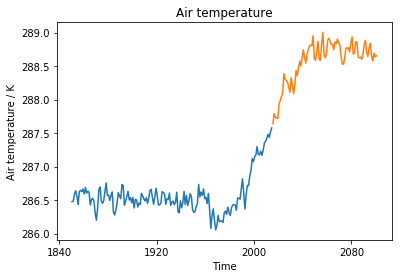

In [18]:
# quickplot automatically adjusts to new data, which is nice.
qplt.plot(ukesm_hist)
qplt.plot(ukesm_ssp119)

plt.show()

In [24]:
def load_n_squeeze(fn):
    return iris.util.squeeze(iris.load_cube(fn))

ukesm_ssp126 = load_n_squeeze(awdir+"tas_Amon_UKESM1-0-LL_ssp126_r1i1p1f2_gn.nc_area_avg.nc")
ukesm_ssp245 = load_n_squeeze(awdir+"tas_Amon_UKESM1-0-LL_ssp245_r1i1p1f2_gn.nc_area_avg.nc")
ukesm_ssp370 = load_n_squeeze(awdir+"tas_Amon_UKESM1-0-LL_ssp370_r1i1p1f2_gn.nc_area_avg.nc")
ukesm_ssp434 = load_n_squeeze(awdir+"tas_Amon_UKESM1-0-LL_ssp434_r1i1p1f2_gn.nc_area_avg.nc")
ukesm_ssp534 = load_n_squeeze(awdir+"tas_Amon_UKESM1-0-LL_ssp534-over_r1i1p1f2_gn.nc_area_avg.nc")
ukesm_ssp584 = load_n_squeeze(awdir+"tas_Amon_UKESM1-0-LL_ssp585_r1i1p1f2_gn.nc_area_avg.nc")

/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


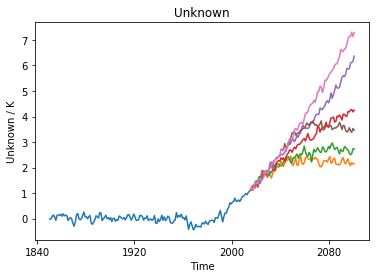

In [28]:
# Plot the entire ensemble
pit = 286.5

qplt.plot(ukesm_hist   - pit)
qplt.plot(ukesm_ssp119 - pit)
qplt.plot(ukesm_ssp126 - pit)
qplt.plot(ukesm_ssp245 - pit)
qplt.plot(ukesm_ssp370 - pit)
qplt.plot(ukesm_ssp534 - pit)
qplt.plot(ukesm_ssp584 - pit)

plt.show()

In [48]:
from os import listdir

#listdir(awdir)

import glob

glob.glob(awdir+'*UKESM*r1i1p1f2*')


['/data/users/hadaw/CMIP6/areaavg/tas/tas_Amon_UKESM1-0-LL_ssp119_r1i1p1f2_gn.nc_area_avg.nc',
 '/data/users/hadaw/CMIP6/areaavg/tas/tas_Amon_UKESM1-0-LL_piControl_r1i1p1f2_gn.nc_area_avg.nc',
 '/data/users/hadaw/CMIP6/areaavg/tas/tas_Amon_UKESM1-0-LL_ssp585_r1i1p1f2_gn.nc_area_avg.nc',
 '/data/users/hadaw/CMIP6/areaavg/tas/tas_Amon_UKESM1-0-LL_ssp370_r1i1p1f2_gn.nc_area_avg.nc',
 '/data/users/hadaw/CMIP6/areaavg/tas/tas_Amon_UKESM1-0-LL_1pctCO2_r1i1p1f2_gn.nc_area_avg.nc',
 '/data/users/hadaw/CMIP6/areaavg/tas/tas_Amon_UKESM1-0-LL_ssp126_r1i1p1f2_gn.nc_area_avg.nc',
 '/data/users/hadaw/CMIP6/areaavg/tas/tas_Amon_UKESM1-0-LL_historical_r1i1p1f2_gn.nc_area_avg.nc',
 '/data/users/hadaw/CMIP6/areaavg/tas/tas_Amon_UKESM1-0-LL_ssp245_r1i1p1f2_gn.nc_area_avg.nc',
 '/data/users/hadaw/CMIP6/areaavg/tas/tas_Amon_UKESM1-0-LL_ssp434_r1i1p1f2_gn.nc_area_avg.nc',
 '/data/users/hadaw/CMIP6/areaavg/tas/tas_Amon_UKESM1-0-LL_ssp534-over_r1i1p1f2_gn.nc_area_avg.nc']

In [49]:
fnlist_historical = glob.glob(awdir+'*historical*r1i*')

#print(fnlist_historical)

['/data/users/hadaw/CMIP6/areaavg/tas/tas_Amon_CanESM5_historical_r1i1p1f1_gn.nc_area_avg.nc',
 '/data/users/hadaw/CMIP6/areaavg/tas/tas_Amon_BCC-ESM1_historical_r1i1p1f1_gn.nc_area_avg.nc',
 '/data/users/hadaw/CMIP6/areaavg/tas/tas_Amon_CNRM-CM6-1_historical_r1i1p1f2_gr.nc_area_avg.nc',
 '/data/users/hadaw/CMIP6/areaavg/tas/tas_Amon_CNRM-ESM2-1_historical_r1i1p1f2_gr.nc_area_avg.nc',
 '/data/users/hadaw/CMIP6/areaavg/tas/tas_Amon_SAM0-UNICON_historical_r1i1p1f1_gn.nc_area_avg.nc',
 '/data/users/hadaw/CMIP6/areaavg/tas/tas_Amon_HadGEM3-GC31-LL_historical_r1i1p1f3_gn.nc_area_avg.nc',
 '/data/users/hadaw/CMIP6/areaavg/tas/tas_Amon_GISS-E2-1-G_historical_r1i1p1f1_gn.nc_area_avg.nc',
 '/data/users/hadaw/CMIP6/areaavg/tas/tas_Amon_BCC-CSM2-MR_historical_r1i1p1f1_gn.nc_area_avg.nc',
 '/data/users/hadaw/CMIP6/areaavg/tas/tas_Amon_GFDL-CM4_historical_r1i1p1f1_gr1.nc_area_avg.nc',
 '/data/users/hadaw/CMIP6/areaavg/tas/tas_Amon_CanESM5_historical_r1i1p2f1_gn.nc_area_avg.nc',
 '/data/users/hadaw/

/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))
/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))
/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))
/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_

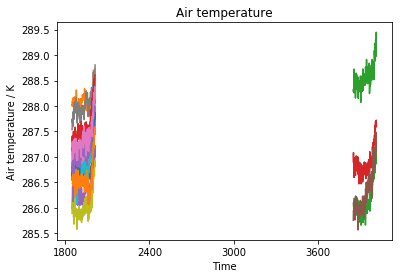

In [44]:
for fn in fnlist_historical:

    cube = load_n_squeeze(fn)
    qplt.plot(cube)
    
plt.show()   